# **Analisis Sentimen Ulasan Aplikasi Wondr SuperApp by BNI pada googleplaystore menggunakan model Naive Bayes Classifier dan SVM**

In [3]:
# Mengimpor library re (Regular Expression) bawaan Python untuk pencocokan pola teks 
import re 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Scrapping Data**

In [1]:
from google_play_scraper import app

In [9]:
# Mengimpor fungsi 'Sort' dan 'reviews' dari google-play-scraper 
# 'Sort' digunakan untuk menentukan urutan ulasan (misalnya terbaru atau rating tertinggi) 
# 'reviews' digunakan untuk mengambil ulasan aplikasi dari Google Play Store 
from google_play_scraper import Sort, reviews

In [11]:
from google_play_scraper import app

# Cek metadata aplikasi
app_info = app('id.bni.wondr')
print(app_info)

{'title': 'wondr by BNI', 'description': 'Your financial partner that intuitively evolves with you!\r\n\r\nLooking for a financial partner to make your life easier? wondr by BNI is here with features to keep your finances smooth and seamlessly fit into your daily needs!\r\n\r\nStarting with managing your finances, wondr is ready to help you pursue your dreams. Planning to save for a vacation? With Life Goals, you can map it all out—from holidays to long-term savings—all in one app!\r\n\r\nNew to investing? wondr makes it easy! Start your Mutual Funds from Rp100k, so you can learn to manage your money for the future. Take care all of your bills with Pay & Buy features for hassle-free transaction.\r\n\r\nUrgently need to top up your TapCash? Do it with just one tap with Express Top-up. For those who always in the rush, get your Whoosh ticket faster and you’re good to go to Bandung!\r\n\r\nLet’s #JadiinMaumu by download and update wondr by BNI today and enjoy all the features that make ma

In [21]:
result, continuation_token = reviews( 
    'id.bni.wondr',                 # ID aplikasi Wonder by BNI di Google Play Store 
    lang='id',                          # Language of the reviews: English 
    country='id',                       # Location of the reviews: Indonesia 
    sort=Sort.NEWEST,                   # Reviews sorted from the newest 
    count=50000,                       # Maximum number of reviews to retrieve (up to 500,000 reviews) 
    filter_score_with=None              # No filter for scores (retrieve all review scores) 
)

df = pd.DataFrame(np.array(result), columns=['review'])

In [23]:
df.head()

,review
0,{'reviewId': '19c4cb8b-e175-4e2a-9f4b-9c63930c...
1,{'reviewId': 'c6514d89-2289-40ba-998e-ccd32b62...
2,{'reviewId': '6a5a5395-0d43-4f83-97a7-c7e87770...
3,{'reviewId': 'f985fb97-1ad7-4aa1-a1b8-2518dc85...
4,{'reviewId': '159ff394-5092-487d-a34b-b7c6f8a4...


In [25]:
# Kemudian DataFrame asli diperbarui dengan menambahkan kolom-kolom ini 
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,19c4cb8b-e175-4e2a-9f4b-9c63930c6a68,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi ribet. Scan wajah sulit kalah dengan ...,1,0,1.2.0,2025-02-02 11:53:53,"Hai Kak Muafhad, maaf atas kendala yang dialam...",2025-02-02 12:12:30,1.2.0
1,c6514d89-2289-40ba-998e-ccd32b6248b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa ga bisa aktivasi rekening yang tidak aktif,1,0,1.2.0,2025-02-02 11:17:10,"Hai Kak Enda, turut menyesal atas kendala yang...",2025-02-02 12:11:16,1.2.0
2,6a5a5395-0d43-4f83-97a7-c7e8777090d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nya tidak berfungsi sama sekali, mau ...",3,0,1.2.0,2025-02-02 10:43:56,"Hai Kak 89 Azhar, maaf atas kendalanya. Saat i...",2025-02-02 11:16:22,1.2.0
3,f985fb97-1ad7-4aa1-a1b8-2518dc859944,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya lupa kode masuk aplikasi dan bingung mau ...,1,0,1.2.0,2025-02-02 10:40:57,"Hai Kak Vera Ayu, turut menyesal atas kendala ...",2025-02-02 11:13:19,1.2.0
4,159ff394-5092-487d-a34b-b7c6f8a473da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa aplikasi nya keluar masuk terus. aplika...,1,0,1.2.0,2025-02-02 10:26:00,"Halo Kak Ninda Sianturi, kami turut menyesal a...",2025-02-02 11:06:55,1.2.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20658 entries, 0 to 20657
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              20658 non-null  object        
 1   userName              20658 non-null  object        
 2   userImage             20658 non-null  object        
 3   content               20658 non-null  object        
 4   score                 20658 non-null  int64         
 5   thumbsUpCount         20658 non-null  int64         
 6   reviewCreatedVersion  17730 non-null  object        
 7   at                    20658 non-null  datetime64[ns]
 8   replyContent          14737 non-null  object        
 9   repliedAt             14737 non-null  datetime64[ns]
 10  appVersion            17730 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.7+ MB


In [29]:
df_new = df.drop(columns = ['userName','reviewCreatedVersion','replyContent','repliedAt','appVersion','userImage','thumbsUpCount'])

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20658 entries, 0 to 20657
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviewId  20658 non-null  object        
 1   content   20658 non-null  object        
 2   score     20658 non-null  int64         
 3   at        20658 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 645.7+ KB


In [37]:
df_new.duplicated().sum()

0

In [39]:
df_new.shape

(20658, 4)

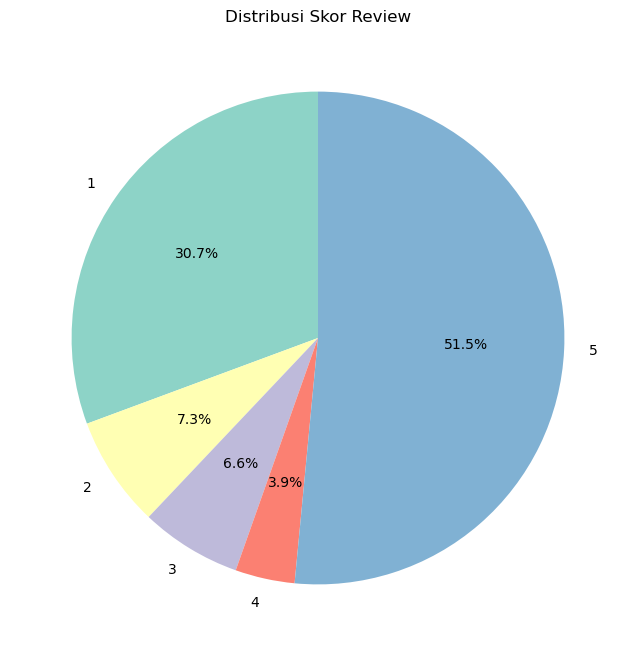

In [41]:
score_counts = df_new['score'].value_counts().sort_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    score_counts,  # Menggunakan jumlah tiap kategori
    labels=score_counts.index,  # Label kategori
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Mulai dari sudut 90 derajat
    colors=plt.cm.Set3.colors  # Warna otomatis
)
plt.title('Distribusi Skor Review')
plt.show()

In [43]:
#potong data 6 bulan terakhir

In [45]:
# Mengonversi kolom 'at' (tanggal ulasan) menjadi tipe data datetime 
df_new['at'] = pd.to_datetime(df_new['at']) 
df_new.head()

,reviewId,content,score,at
0,19c4cb8b-e175-4e2a-9f4b-9c63930c6a68,Aplikasi ribet. Scan wajah sulit kalah dengan ...,1,2025-02-02 11:53:53
1,c6514d89-2289-40ba-998e-ccd32b6248b4,Kenapa ga bisa aktivasi rekening yang tidak aktif,1,2025-02-02 11:17:10
2,6a5a5395-0d43-4f83-97a7-c7e8777090d6,"Aplikasi nya tidak berfungsi sama sekali, mau ...",3,2025-02-02 10:43:56
3,f985fb97-1ad7-4aa1-a1b8-2518dc859944,saya lupa kode masuk aplikasi dan bingung mau ...,1,2025-02-02 10:40:57
4,159ff394-5092-487d-a34b-b7c6f8a473da,kenapa aplikasi nya keluar masuk terus. aplika...,1,2025-02-02 10:26:00


In [47]:
start_date = '2024-07-05'
end_date = '2025-01-10'

# Memfilter ulasan berdasarkan rentang tanggal 
# Hanya ulasan dengan tanggal antara 'start_date' dan 'end_date' yang disertakan 
df = df_new[(df_new['at'] >= start_date) & (df_new['at'] <= end_date)] 

In [49]:
df.shape

(19197, 4)

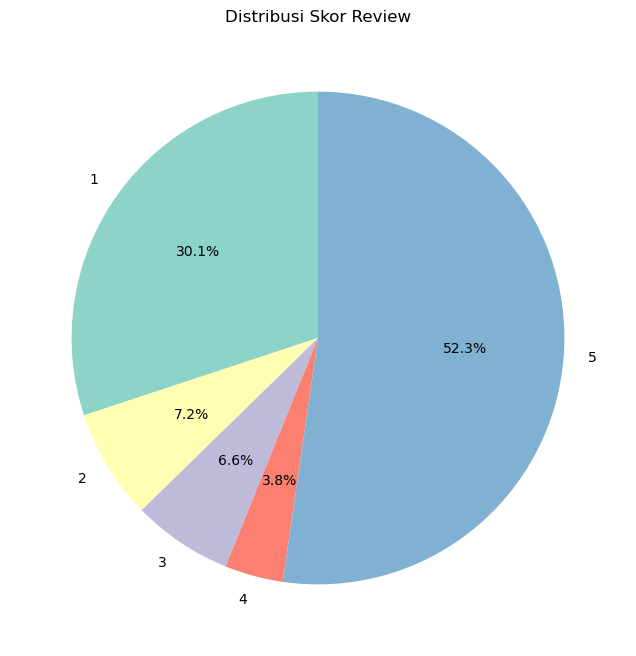

In [53]:
#score after data cut
score_counts = df['score'].value_counts().sort_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    score_counts,  # Menggunakan jumlah tiap kategori
    labels=score_counts.index,  # Label kategori
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Mulai dari sudut 90 derajat
    colors=plt.cm.Set3.colors  # Warna otomatis
)
plt.title('Distribusi Skor Review')
plt.show()

In [55]:
df.to_csv("hasil_scraper_wondrapp.csv", index=False)

## **Pre-Processing**

In [3]:
data = pd.read_csv("hasil_scraper_wondrapp.csv")
data

,reviewId,content,score,at
0,9618ec67-62d7-4628-8e3f-13c43501c097,Kenapa sering bug?? Saat masuk pasti muncul sy...,1,2025-01-09 23:44:42
1,c5d26447-2c41-46d7-b73b-2f37a0c33651,"Kecewa, menu setor tunai, tarik tunai, tidak a...",1,2025-01-09 22:57:33
2,acdf3955-8e1a-4413-9400-69aab5ff41b6,Aplikasi tidak bisa tarik dan setor tunai. Apa...,2,2025-01-09 22:53:41
3,d0bd9297-c636-41e5-a0c7-66ecfa7b0eee,Verifikasi wajah mempersulit custumer.klo mau ...,1,2025-01-09 22:33:56
4,c917e222-ace9-425f-8e92-f76d4cc1fd61,Baru mau dftr udh bug,1,2025-01-09 22:26:29
...,...,...,...,...
19192,0ac12823-3664-4ab2-9d8b-eda276fd46f6,mantap .. kurang ada candles nya,5,2024-07-05 04:45:41
19193,c1aa3085-25db-4b11-a227-0a47ea8682ef,Good,5,2024-07-05 02:54:22
19194,e4b1e929-9846-4d22-a5e1-a2da510d849b,Aplikasi baru dari BNI .. mantap,5,2024-07-05 01:16:33
19195,976774c2-cef8-4574-8801-65e8465c21d4,"Semua transaksi dalam satu genggaman, Wondr by...",5,2024-07-05 00:18:19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19197 entries, 0 to 19196
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  19197 non-null  object
 1   content   19197 non-null  object
 2   score     19197 non-null  int64 
 3   at        19197 non-null  object
dtypes: int64(1), object(3)
memory usage: 600.0+ KB


### Tahapan
More advanced preprocessing
Oleh sebab itu kita melakukan:

- normalisasi: menghindari 2 hal yang maknanya sama seperti Saya dan saya
- tokenisasi: menghindari token yang tidak diproses dengan baik misalnya halo, atau ini?

Lebih jauh lagi akan ada teknik pemrosesan seperti:

- stemming: menghindari kesamaan makna karena imbuhan seperti pukul dan memukul
- lematisasi: mengembalikan kata ke bentuk dasarnya seperti jum'at menjadi jumat

Package yang terkenal untuk stemming bahasa Indonesia: Satrawi, SpaCy
Package yang terkenal untuk lematisasi bahasa Indonesia: SpaCy

### Cleaning Emote, Tanda , dl

In [9]:
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IQBAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\IQBAL\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [11]:
# Fungsi menghapus emotikon
def remove_emoji(text):
    if text is not None and isinstance(text, str):
        emoji_pattern = re.compile(
            u"[\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001FC00-\U0001FCFF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
            "]+", flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', text)
    else:
        return text

# Fungsi untuk menghapus URL
def remove_URL(text):
    if text is not None and isinstance(text, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', text)
    else:
        return text

# Fungsi untuk menghapus HTML
def remove_html(text):
    if text is not None and isinstance(text, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', text)
    else:
        return text

# Fungsi untuk menghapus simbol
def remove_symbols(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    return text

def remove_numbers(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r'\d','', text)
    return text

def clean_repeated_chars(text):
    """Menghapus huruf berulang lebih dari dua kali dalam kata"""
    return re.sub(r'(\w)\1{2,}', r'\1', text)

In [13]:
data['cleaning'] = data['content'].apply(remove_emoji)
data['cleaning'] = data['cleaning'].apply(remove_URL)
data['cleaning'] = data['cleaning'].apply(remove_html)
data['cleaning'] = data['cleaning'].apply(remove_symbols)
data['cleaning'] = data['cleaning'].apply(remove_numbers)
data['cleaning'] = data['cleaning'].str.lower()
data["cleaning"] = data["cleaning"].apply(clean_repeated_chars)


data.head(10)

,reviewId,content,score,at,cleaning
0,9618ec67-62d7-4628-8e3f-13c43501c097,Kenapa sering bug?? Saat masuk pasti muncul sy...,1,2025-01-09 23:44:42,kenapa sering bug saat masuk pasti muncul sy...
1,c5d26447-2c41-46d7-b73b-2f37a0c33651,"Kecewa, menu setor tunai, tarik tunai, tidak a...",1,2025-01-09 22:57:33,kecewa menu setor tunai tarik tunai tidak a...
2,acdf3955-8e1a-4413-9400-69aab5ff41b6,Aplikasi tidak bisa tarik dan setor tunai. Apa...,2,2025-01-09 22:53:41,aplikasi tidak bisa tarik dan setor tunai apa...
3,d0bd9297-c636-41e5-a0c7-66ecfa7b0eee,Verifikasi wajah mempersulit custumer.klo mau ...,1,2025-01-09 22:33:56,verifikasi wajah mempersulit custumer klo mau ...
4,c917e222-ace9-425f-8e92-f76d4cc1fd61,Baru mau dftr udh bug,1,2025-01-09 22:26:29,baru mau dftr udh bug
5,d50caa8f-e8be-45f6-a96c-896c8d9c4fe5,Ok,5,2025-01-09 21:07:41,ok
6,10cfa2ec-8176-4b8d-8560-f7b6a1fda341,Best,5,2025-01-09 20:42:15,best
7,fee3fb78-9862-4191-bd9e-1a70e1544742,Banyak fitur di BNI mobile yg tidak tersedia d...,3,2025-01-09 20:07:50,banyak fitur di bni mobile yg tidak tersedia d...
8,ce981b06-ebcf-417b-a55a-91693e81e38f,Cara masukin nomor rekening lama yang lebih da...,2,2025-01-09 19:27:33,cara masukin nomor rekening lama yang lebih da...
9,4254ce8d-36af-4f81-bf2d-52b3cdf88128,Bad,1,2025-01-09 18:24:51,bad


### UBAH KATA JADI LEBIH BAKU

In [16]:
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                #else
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [18]:
#Kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'],kamus_data['kata_baku']))

In [19]:
data['baku'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['cleaning'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))


df = pd.DataFrame(data[['at', 'score', 'content', 'cleaning', 'baku']])
df.head(10)

,at,score,content,cleaning,baku
0,2025-01-09 23:44:42,1,Kenapa sering bug?? Saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul syar...
1,2025-01-09 22:57:33,1,"Kecewa, menu setor tunai, tarik tunai, tidak a...",kecewa menu setor tunai tarik tunai tidak a...,kecewa menu setor tunai tarik tunai tidak ada ...
2,2025-01-09 22:53:41,2,Aplikasi tidak bisa tarik dan setor tunai. Apa...,aplikasi tidak bisa tarik dan setor tunai apa...,aplikasi tidak bisa tarik dan setor tunai apa ...
3,2025-01-09 22:33:56,1,Verifikasi wajah mempersulit custumer.klo mau ...,verifikasi wajah mempersulit custumer klo mau ...,verifikasi wajah mempersulit custumer kalau ma...
4,2025-01-09 22:26:29,1,Baru mau dftr udh bug,baru mau dftr udh bug,baru mau daftar sudah bug
5,2025-01-09 21:07:41,5,Ok,ok,ok
6,2025-01-09 20:42:15,5,Best,best,best
7,2025-01-09 20:07:50,3,Banyak fitur di BNI mobile yg tidak tersedia d...,banyak fitur di bni mobile yg tidak tersedia d...,banyak fitur di bni mobile yang tidak tersedia...
8,2025-01-09 19:27:33,2,Cara masukin nomor rekening lama yang lebih da...,cara masukin nomor rekening lama yang lebih da...,cara memasuki nomor rekening lama yang lebih d...
9,2025-01-09 18:24:51,1,Bad,bad,bad


### Tokenization

In [21]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenized'] = df['baku'].apply(tokenize)
df.head(10)

,at,score,content,cleaning,baku,tokenized
0,2025-01-09 23:44:42,1,Kenapa sering bug?? Saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul syar...,"[kenapa, sering, bug, saat, masuk, pasti, munc..."
1,2025-01-09 22:57:33,1,"Kecewa, menu setor tunai, tarik tunai, tidak a...",kecewa menu setor tunai tarik tunai tidak a...,kecewa menu setor tunai tarik tunai tidak ada ...,"[kecewa, menu, setor, tunai, tarik, tunai, tid..."
2,2025-01-09 22:53:41,2,Aplikasi tidak bisa tarik dan setor tunai. Apa...,aplikasi tidak bisa tarik dan setor tunai apa...,aplikasi tidak bisa tarik dan setor tunai apa ...,"[aplikasi, tidak, bisa, tarik, dan, setor, tun..."
3,2025-01-09 22:33:56,1,Verifikasi wajah mempersulit custumer.klo mau ...,verifikasi wajah mempersulit custumer klo mau ...,verifikasi wajah mempersulit custumer kalau ma...,"[verifikasi, wajah, mempersulit, custumer, kal..."
4,2025-01-09 22:26:29,1,Baru mau dftr udh bug,baru mau dftr udh bug,baru mau daftar sudah bug,"[baru, mau, daftar, sudah, bug]"
5,2025-01-09 21:07:41,5,Ok,ok,ok,[ok]
6,2025-01-09 20:42:15,5,Best,best,best,[best]
7,2025-01-09 20:07:50,3,Banyak fitur di BNI mobile yg tidak tersedia d...,banyak fitur di bni mobile yg tidak tersedia d...,banyak fitur di bni mobile yang tidak tersedia...,"[banyak, fitur, di, bni, mobile, yang, tidak, ..."
8,2025-01-09 19:27:33,2,Cara masukin nomor rekening lama yang lebih da...,cara masukin nomor rekening lama yang lebih da...,cara memasuki nomor rekening lama yang lebih d...,"[cara, memasuki, nomor, rekening, lama, yang, ..."
9,2025-01-09 18:24:51,1,Bad,bad,bad,[bad]


### Stopword Remove

In [26]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IQBAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Fungsi menghapus stopwords
stop_words = stopwords.words('indonesian')
custom_stopwords = {'ya'}
all_stopwords = set(stop_words).union(custom_stopwords)
all_stopwords.discard('baik')

def remove_stopword(tokens):
    return [word for word in tokens if word.lower() not in all_stopwords]

In [30]:
df['stopword_remove'] = df['tokenized'].apply(lambda x: remove_stopword(x))

In [32]:
df.head(10)

,at,score,content,cleaning,baku,tokenized,stopword_remove
0,2025-01-09 23:44:42,1,Kenapa sering bug?? Saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul syar...,"[kenapa, sering, bug, saat, masuk, pasti, munc...","[bug, masuk, muncul, syarat, menerus, emosii, ..."
1,2025-01-09 22:57:33,1,"Kecewa, menu setor tunai, tarik tunai, tidak a...",kecewa menu setor tunai tarik tunai tidak a...,kecewa menu setor tunai tarik tunai tidak ada ...,"[kecewa, menu, setor, tunai, tarik, tunai, tid...","[kecewa, menu, setor, tunai, tarik, tunai, men..."
2,2025-01-09 22:53:41,2,Aplikasi tidak bisa tarik dan setor tunai. Apa...,aplikasi tidak bisa tarik dan setor tunai apa...,aplikasi tidak bisa tarik dan setor tunai apa ...,"[aplikasi, tidak, bisa, tarik, dan, setor, tun...","[aplikasi, tarik, setor, tunai, gunanya, aplik..."
3,2025-01-09 22:33:56,1,Verifikasi wajah mempersulit custumer.klo mau ...,verifikasi wajah mempersulit custumer klo mau ...,verifikasi wajah mempersulit custumer kalau ma...,"[verifikasi, wajah, mempersulit, custumer, kal...","[verifikasi, wajah, mempersulit, custumer, ver..."
4,2025-01-09 22:26:29,1,Baru mau dftr udh bug,baru mau dftr udh bug,baru mau daftar sudah bug,"[baru, mau, daftar, sudah, bug]","[daftar, bug]"
5,2025-01-09 21:07:41,5,Ok,ok,ok,[ok],[ok]
6,2025-01-09 20:42:15,5,Best,best,best,[best],[best]
7,2025-01-09 20:07:50,3,Banyak fitur di BNI mobile yg tidak tersedia d...,banyak fitur di bni mobile yg tidak tersedia d...,banyak fitur di bni mobile yang tidak tersedia...,"[banyak, fitur, di, bni, mobile, yang, tidak, ...","[fitur, bni, mobile, tersedia, wondr, aktivasi..."
8,2025-01-09 19:27:33,2,Cara masukin nomor rekening lama yang lebih da...,cara masukin nomor rekening lama yang lebih da...,cara memasuki nomor rekening lama yang lebih d...,"[cara, memasuki, nomor, rekening, lama, yang, ...","[memasuki, nomor, rekening, aplikasi, user, fr..."
9,2025-01-09 18:24:51,1,Bad,bad,bad,[bad],[bad]


### Steming data

In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [37]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming teks
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# Menerapkan stemming pada kolom 'stopword removal'
df['steming_data'] = df['stopword_remove'].apply(lambda x: ' '.join(stem_text(x)))
df.head(10)

,at,score,content,cleaning,baku,tokenized,stopword_remove,steming_data
0,2025-01-09 23:44:42,1,Kenapa sering bug?? Saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul syar...,"[kenapa, sering, bug, saat, masuk, pasti, munc...","[bug, masuk, muncul, syarat, menerus, emosii, ...",bug masuk muncul syarat terus emosi aplikasi
1,2025-01-09 22:57:33,1,"Kecewa, menu setor tunai, tarik tunai, tidak a...",kecewa menu setor tunai tarik tunai tidak a...,kecewa menu setor tunai tarik tunai tidak ada ...,"[kecewa, menu, setor, tunai, tarik, tunai, tid...","[kecewa, menu, setor, tunai, tarik, tunai, men...",kecewa menu setor tunai tarik tunai setor tell...
2,2025-01-09 22:53:41,2,Aplikasi tidak bisa tarik dan setor tunai. Apa...,aplikasi tidak bisa tarik dan setor tunai apa...,aplikasi tidak bisa tarik dan setor tunai apa ...,"[aplikasi, tidak, bisa, tarik, dan, setor, tun...","[aplikasi, tarik, setor, tunai, gunanya, aplik...",aplikasi tarik setor tunai guna aplikasi banki...
3,2025-01-09 22:33:56,1,Verifikasi wajah mempersulit custumer.klo mau ...,verifikasi wajah mempersulit custumer klo mau ...,verifikasi wajah mempersulit custumer kalau ma...,"[verifikasi, wajah, mempersulit, custumer, kal...","[verifikasi, wajah, mempersulit, custumer, ver...",verifikasi wajah sulit custumer verifikasi aja...
4,2025-01-09 22:26:29,1,Baru mau dftr udh bug,baru mau dftr udh bug,baru mau daftar sudah bug,"[baru, mau, daftar, sudah, bug]","[daftar, bug]",daftar bug
5,2025-01-09 21:07:41,5,Ok,ok,ok,[ok],[ok],ok
6,2025-01-09 20:42:15,5,Best,best,best,[best],[best],best
7,2025-01-09 20:07:50,3,Banyak fitur di BNI mobile yg tidak tersedia d...,banyak fitur di bni mobile yg tidak tersedia d...,banyak fitur di bni mobile yang tidak tersedia...,"[banyak, fitur, di, bni, mobile, yang, tidak, ...","[fitur, bni, mobile, tersedia, wondr, aktivasi...",fitur bni mobile sedia wondr aktivasi kartu be...
8,2025-01-09 19:27:33,2,Cara masukin nomor rekening lama yang lebih da...,cara masukin nomor rekening lama yang lebih da...,cara memasuki nomor rekening lama yang lebih d...,"[cara, memasuki, nomor, rekening, lama, yang, ...","[memasuki, nomor, rekening, aplikasi, user, fr...",pasuk nomor rekening aplikasi user friendly
9,2025-01-09 18:24:51,1,Bad,bad,bad,[bad],[bad],bad


In [39]:
df.to_csv("hasil_cleaning_wondrapp.csv", index=False)

## **Labelling Data**

In [3]:
df = pd.read_csv("hasil_cleaning_wondrapp.csv")
df

,at,score,content,cleaning,baku,tokenized,stopword_remove,steming_data
0,1/9/2025 23:44,1,Kenapa sering bug?? Saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul syar...,"['kenapa', 'sering', 'bug', 'saat', 'masuk', '...","['bug', 'masuk', 'muncul', 'syarat', 'menerus'...",bug masuk muncul syarat terus emosi aplikasi
1,1/9/2025 22:57,1,"Kecewa, menu setor tunai, tarik tunai, tidak a...",kecewa menu setor tunai tarik tunai tidak a...,kecewa menu setor tunai tarik tunai tidak ada ...,"['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...","['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...",kecewa menu setor tunai tarik tunai setor tell...
2,1/9/2025 22:53,2,Aplikasi tidak bisa tarik dan setor tunai. Apa...,aplikasi tidak bisa tarik dan setor tunai apa...,aplikasi tidak bisa tarik dan setor tunai apa ...,"['aplikasi', 'tidak', 'bisa', 'tarik', 'dan', ...","['aplikasi', 'tarik', 'setor', 'tunai', 'gunan...",aplikasi tarik setor tunai guna aplikasi banki...
3,1/9/2025 22:33,1,Verifikasi wajah mempersulit custumer.klo mau ...,verifikasi wajah mempersulit custumer klo mau ...,verifikasi wajah mempersulit custumer kalau ma...,"['verifikasi', 'wajah', 'mempersulit', 'custum...","['verifikasi', 'wajah', 'mempersulit', 'custum...",verifikasi wajah sulit custumer verifikasi aja...
4,1/9/2025 22:26,1,Baru mau dftr udh bug,baru mau dftr udh bug,baru mau daftar sudah bug,"['baru', 'mau', 'daftar', 'sudah', 'bug']","['daftar', 'bug']",daftar bug
...,...,...,...,...,...,...,...,...
19192,7/5/2024 4:45,5,mantap .. kurang ada candles nya,mantap kurang ada candles nya,mantap kurang ada candles ya,"['mantap', 'kurang', 'ada', 'candles', 'ya']","['mantap', 'candles']",mantap candles
19193,7/5/2024 2:54,5,Good,good,good,['good'],['good'],good
19194,7/5/2024 1:16,5,Aplikasi baru dari BNI .. mantap,aplikasi baru dari bni mantap,aplikasi baru dari bni mantap,"['aplikasi', 'baru', 'dari', 'bni', 'mantap']","['aplikasi', 'bni', 'mantap']",aplikasi bni mantap
19195,7/5/2024 0:18,5,"Semua transaksi dalam satu genggaman, Wondr by...",semua transaksi dalam satu genggaman wondr by...,semua transaksi dalam satu genggaman wondr by ...,"['semua', 'transaksi', 'dalam', 'satu', 'gengg...","['transaksi', 'genggaman', 'wondr', 'by', 'bni...",transaksi genggam wondr by bni the moon


In [5]:
df = df.dropna(subset=['steming_data'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19085 entries, 0 to 19196
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   at               19085 non-null  object
 1   score            19085 non-null  int64 
 2   content          19085 non-null  object
 3   cleaning         19085 non-null  object
 4   baku             19085 non-null  object
 5   tokenized        19085 non-null  object
 6   stopword_remove  19085 non-null  object
 7   steming_data     19085 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.3+ MB


In [17]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()

positive_lexicon = pd.read_csv("positive2.csv", header=0)
negative_lexicon = pd.read_csv("negative2.csv", header=0)

lexicon_dict = {word: 1 for word in positive_lexicon['word']}  # Bobot positif (+1)
lexicon_dict.update({word: -1 for word in negative_lexicon['word']})  # Bobot negatif (-1)

def weight_sentiment(text):
    words = text.split()  # Pisahkan kata-kata dalam teks
    sentiment = sum([lexicon_dict.get(word, 0) for word in words])  # Hitung bobot
    return sentiment

# Terapkan fungsi ke kolom 'steming_data' menggunakan progress_apply
df.loc[:, "weight"] = df["steming_data"].progress_apply(weight_sentiment)

  0%|          | 0/19085 [00:00<?, ?it/s]

C:\Users\IQBAL\AppData\Local\Temp\ipykernel_16480\4089871356.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "weight"] = df["steming_data"].progress_apply(weight_sentiment)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19085 entries, 0 to 19196
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   at               19085 non-null  object
 1   score            19085 non-null  int64 
 2   content          19085 non-null  object
 3   cleaning         19085 non-null  object
 4   baku             19085 non-null  object
 5   tokenized        19085 non-null  object
 6   stopword_remove  19085 non-null  object
 7   steming_data     19085 non-null  object
 8   weight           19085 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


In [21]:
df.head(20)

,at,score,content,cleaning,baku,tokenized,stopword_remove,steming_data,weight
0,1/9/2025 23:44,1,Kenapa sering bug?? Saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul sy...,kenapa sering bug saat masuk pasti muncul syar...,"['kenapa', 'sering', 'bug', 'saat', 'masuk', '...","['bug', 'masuk', 'muncul', 'syarat', 'menerus'...",bug masuk muncul syarat terus emosi aplikasi,0
1,1/9/2025 22:57,1,"Kecewa, menu setor tunai, tarik tunai, tidak a...",kecewa menu setor tunai tarik tunai tidak a...,kecewa menu setor tunai tarik tunai tidak ada ...,"['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...","['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...",kecewa menu setor tunai tarik tunai setor tell...,3
2,1/9/2025 22:53,2,Aplikasi tidak bisa tarik dan setor tunai. Apa...,aplikasi tidak bisa tarik dan setor tunai apa...,aplikasi tidak bisa tarik dan setor tunai apa ...,"['aplikasi', 'tidak', 'bisa', 'tarik', 'dan', ...","['aplikasi', 'tarik', 'setor', 'tunai', 'gunan...",aplikasi tarik setor tunai guna aplikasi banki...,1
3,1/9/2025 22:33,1,Verifikasi wajah mempersulit custumer.klo mau ...,verifikasi wajah mempersulit custumer klo mau ...,verifikasi wajah mempersulit custumer kalau ma...,"['verifikasi', 'wajah', 'mempersulit', 'custum...","['verifikasi', 'wajah', 'mempersulit', 'custum...",verifikasi wajah sulit custumer verifikasi aja...,0
4,1/9/2025 22:26,1,Baru mau dftr udh bug,baru mau dftr udh bug,baru mau daftar sudah bug,"['baru', 'mau', 'daftar', 'sudah', 'bug']","['daftar', 'bug']",daftar bug,-1
5,1/9/2025 21:07,5,Ok,ok,ok,['ok'],['ok'],ok,1
6,1/9/2025 20:42,5,Best,best,best,['best'],['best'],best,1
7,1/9/2025 20:07,3,Banyak fitur di BNI mobile yg tidak tersedia d...,banyak fitur di bni mobile yg tidak tersedia d...,banyak fitur di bni mobile yang tidak tersedia...,"['banyak', 'fitur', 'di', 'bni', 'mobile', 'ya...","['fitur', 'bni', 'mobile', 'tersedia', 'wondr'...",fitur bni mobile sedia wondr aktivasi kartu be...,7
8,1/9/2025 19:27,2,Cara masukin nomor rekening lama yang lebih da...,cara masukin nomor rekening lama yang lebih da...,cara memasuki nomor rekening lama yang lebih d...,"['cara', 'memasuki', 'nomor', 'rekening', 'lam...","['memasuki', 'nomor', 'rekening', 'aplikasi', ...",pasuk nomor rekening aplikasi user friendly,0
9,1/9/2025 18:24,1,Bad,bad,bad,['bad'],['bad'],bad,-1


In [23]:
# Classify into pos/neg
df['label'] = [
    "positive" if weight > 0 else 
    "negative" if weight < 0 else 
    "neutral"
    for weight in df['weight']
]

C:\Users\IQBAL\AppData\Local\Temp\ipykernel_16480\1061592993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = [


In [27]:
df = df[df["label"] != "neutral"]
df.reset_index(drop=True, inplace=True)

In [29]:
df['label'].value_counts()

label
positive    13746
negative     2818
Name: count, dtype: int64

In [31]:
df.head()

,at,score,content,cleaning,baku,tokenized,stopword_remove,steming_data,weight,label
0,1/9/2025 22:57,1,"Kecewa, menu setor tunai, tarik tunai, tidak a...",kecewa menu setor tunai tarik tunai tidak a...,kecewa menu setor tunai tarik tunai tidak ada ...,"['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...","['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...",kecewa menu setor tunai tarik tunai setor tell...,3,positive
1,1/9/2025 22:53,2,Aplikasi tidak bisa tarik dan setor tunai. Apa...,aplikasi tidak bisa tarik dan setor tunai apa...,aplikasi tidak bisa tarik dan setor tunai apa ...,"['aplikasi', 'tidak', 'bisa', 'tarik', 'dan', ...","['aplikasi', 'tarik', 'setor', 'tunai', 'gunan...",aplikasi tarik setor tunai guna aplikasi banki...,1,positive
2,1/9/2025 22:26,1,Baru mau dftr udh bug,baru mau dftr udh bug,baru mau daftar sudah bug,"['baru', 'mau', 'daftar', 'sudah', 'bug']","['daftar', 'bug']",daftar bug,-1,negative
3,1/9/2025 21:07,5,Ok,ok,ok,['ok'],['ok'],ok,1,positive
4,1/9/2025 20:42,5,Best,best,best,['best'],['best'],best,1,positive


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16564 entries, 0 to 16563
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   at               16564 non-null  object
 1   score            16564 non-null  int64 
 2   content          16564 non-null  object
 3   cleaning         16564 non-null  object
 4   baku             16564 non-null  object
 5   tokenized        16564 non-null  object
 6   stopword_remove  16564 non-null  object
 7   steming_data     16564 non-null  object
 8   weight           16564 non-null  int64 
 9   label            16564 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.3+ MB


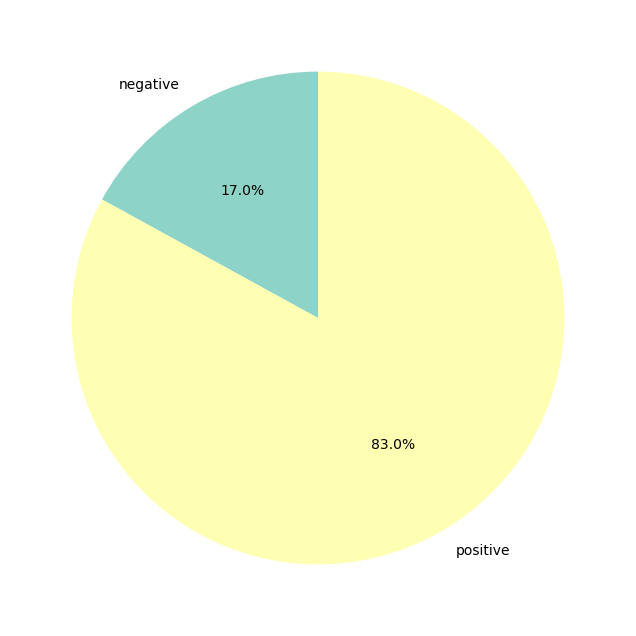

In [35]:
sentimen_counts = df['label'].value_counts().sort_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    sentimen_counts,  # Menggunakan jumlah tiap kategori
    labels=sentimen_counts.index,  # Label kategori
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Mulai dari sudut 90 derajat
    colors=plt.cm.Set3.colors  # Warna otomatis
)
plt.show()

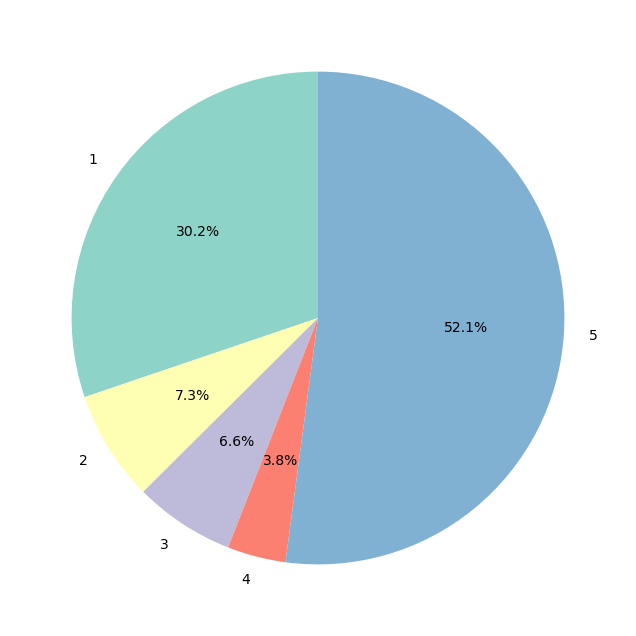

In [43]:
sentimen_counts = df['score'].value_counts().sort_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    sentimen_counts,  # Menggunakan jumlah tiap kategori
    labels=sentimen_counts.index,  # Label kategori
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Mulai dari sudut 90 derajat
    colors=plt.cm.Set3.colors  # Warna otomatis
)
plt.show()

In [45]:
df.to_csv("hasil_labeling2_wondrapp.csv", index=False)

### *Visualisasi WordCloud*

In [4]:
df = pd.read_csv("hasil_labeling2_wondrapp.csv")
df

,at,score,content,cleaning,baku,tokenized,stopword_remove,steming_data,weight,label
0,1/9/2025 22:57,1,"Kecewa, menu setor tunai, tarik tunai, tidak a...",kecewa menu setor tunai tarik tunai tidak a...,kecewa menu setor tunai tarik tunai tidak ada ...,"['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...","['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...",kecewa menu setor tunai tarik tunai setor tell...,3,positive
1,1/9/2025 22:53,2,Aplikasi tidak bisa tarik dan setor tunai. Apa...,aplikasi tidak bisa tarik dan setor tunai apa...,aplikasi tidak bisa tarik dan setor tunai apa ...,"['aplikasi', 'tidak', 'bisa', 'tarik', 'dan', ...","['aplikasi', 'tarik', 'setor', 'tunai', 'gunan...",aplikasi tarik setor tunai guna aplikasi banki...,1,positive
2,1/9/2025 22:26,1,Baru mau dftr udh bug,baru mau dftr udh bug,baru mau daftar sudah bug,"['baru', 'mau', 'daftar', 'sudah', 'bug']","['daftar', 'bug']",daftar bug,-1,negative
3,1/9/2025 21:07,5,Ok,ok,ok,['ok'],['ok'],ok,1,positive
4,1/9/2025 20:42,5,Best,best,best,['best'],['best'],best,1,positive
...,...,...,...,...,...,...,...,...,...,...
16559,7/5/2024 4:45,5,mantap .. kurang ada candles nya,mantap kurang ada candles nya,mantap kurang ada candles ya,"['mantap', 'kurang', 'ada', 'candles', 'ya']","['mantap', 'candles']",mantap candles,1,positive
16560,7/5/2024 2:54,5,Good,good,good,['good'],['good'],good,1,positive
16561,7/5/2024 1:16,5,Aplikasi baru dari BNI .. mantap,aplikasi baru dari bni mantap,aplikasi baru dari bni mantap,"['aplikasi', 'baru', 'dari', 'bni', 'mantap']","['aplikasi', 'bni', 'mantap']",aplikasi bni mantap,1,positive
16562,7/5/2024 0:18,5,"Semua transaksi dalam satu genggaman, Wondr by...",semua transaksi dalam satu genggaman wondr by...,semua transaksi dalam satu genggaman wondr by ...,"['semua', 'transaksi', 'dalam', 'satu', 'gengg...","['transaksi', 'genggaman', 'wondr', 'by', 'bni...",transaksi genggam wondr by bni the moon,1,positive


In [10]:
def generate_wordcloud(data, ngram=(1,1), title='Word Cloud'):
    vectorizer = CountVectorizer(ngram_range=ngram)
    X = vectorizer.fit_transform(data)

    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    word_freq_dict = dict(words_freq[:50])  # ambil 50 paling sering

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis').generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

In [14]:
def generate_wordcloud(data, ngram=(1,1), title='Word Cloud'):
    vectorizer = CountVectorizer(ngram_range=ngram)
    X = vectorizer.fit_transform(data)

    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    word_freq_dict = dict(words_freq[:50])
    
    hapus_kata = ['aplikasi', 'wondr', 'bni','by']
    # Hapus semua bigram yang mengandung kata dalam hapus_kata
    word_freq_dict = {word: freq for word, freq in words_freq[:50] if not any(kata in word for kata in hapus_kata)}
    
    # Hapus semua kata dalam list hapus_kata
    for kata in hapus_kata:
        word_freq_dict.pop(kata, None)

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis').generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

### *Uni-Gram*

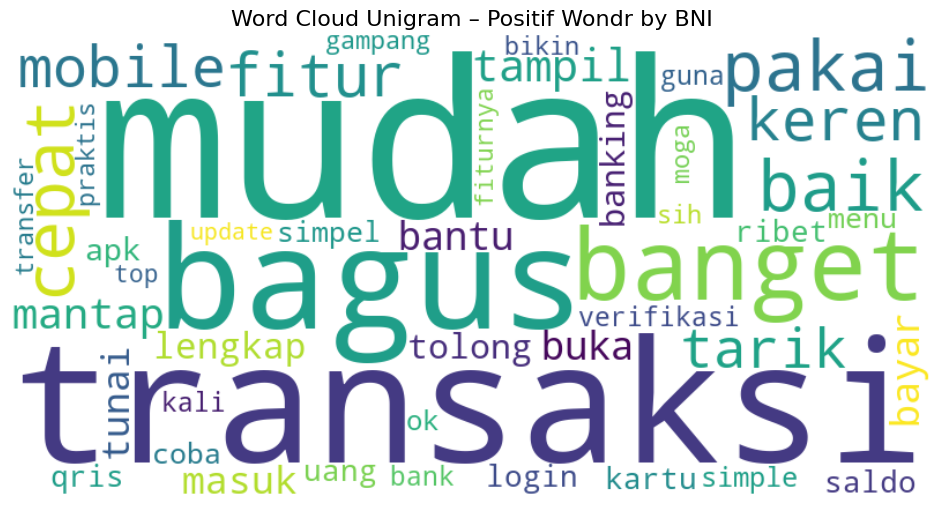

In [15]:
positif_reviews = df[df['label'] == 'positive']['steming_data']
generate_wordcloud(positif_reviews, ngram=(1,1), title='Word Cloud Unigram – Positif Wondr by BNI')

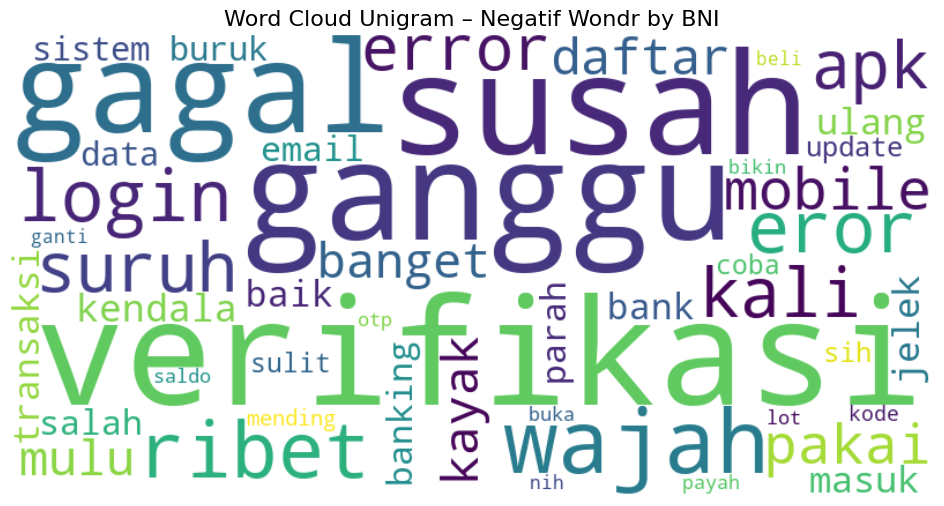

In [16]:
negatif_reviews = df[df['label'] == 'negative']['steming_data']
generate_wordcloud(negatif_reviews, ngram=(1,1), title='Word Cloud Unigram – Negatif Wondr by BNI')

### *Bi-Gram*

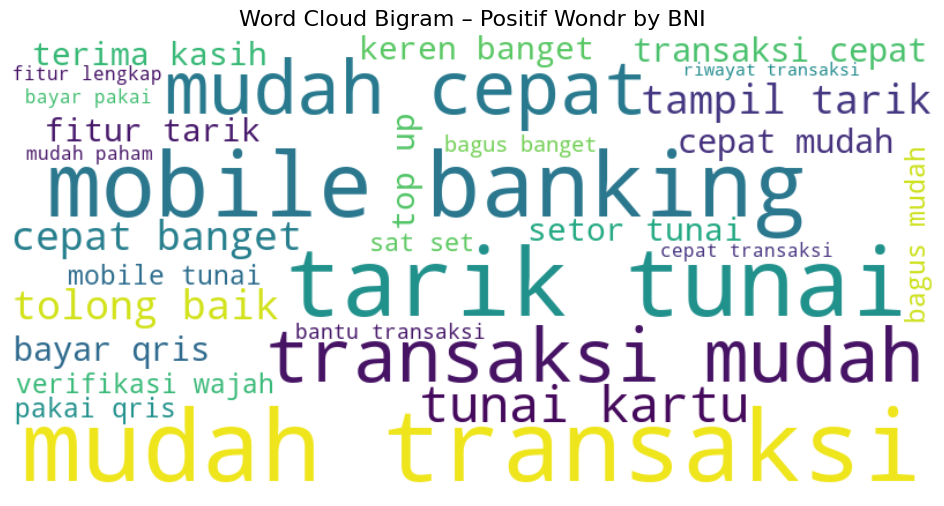

In [17]:
generate_wordcloud(positif_reviews, ngram=(2,2), title='Word Cloud Bigram – Positif Wondr by BNI')

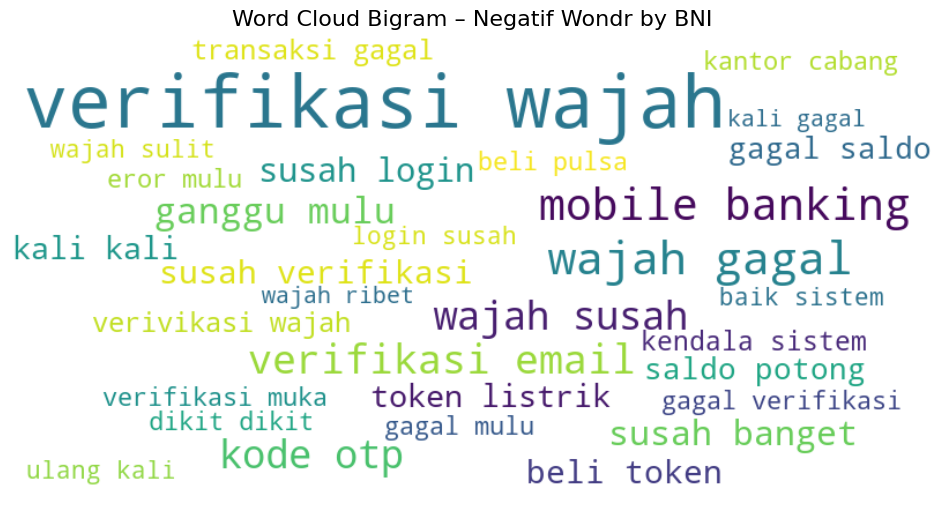

In [18]:
generate_wordcloud(negatif_reviews, ngram=(2,2), title='Word Cloud Bigram – Negatif Wondr by BNI')

## **MODELING** ##

### TFIDF

In [3]:
df = pd.read_csv("hasil_labeling2_wondrapp.csv")
df

,at,score,content,cleaning,baku,tokenized,stopword_remove,steming_data,weight,label
0,1/9/2025 22:57,1,"Kecewa, menu setor tunai, tarik tunai, tidak a...",kecewa menu setor tunai tarik tunai tidak a...,kecewa menu setor tunai tarik tunai tidak ada ...,"['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...","['kecewa', 'menu', 'setor', 'tunai', 'tarik', ...",kecewa menu setor tunai tarik tunai setor tell...,3,positive
1,1/9/2025 22:53,2,Aplikasi tidak bisa tarik dan setor tunai. Apa...,aplikasi tidak bisa tarik dan setor tunai apa...,aplikasi tidak bisa tarik dan setor tunai apa ...,"['aplikasi', 'tidak', 'bisa', 'tarik', 'dan', ...","['aplikasi', 'tarik', 'setor', 'tunai', 'gunan...",aplikasi tarik setor tunai guna aplikasi banki...,1,positive
2,1/9/2025 22:26,1,Baru mau dftr udh bug,baru mau dftr udh bug,baru mau daftar sudah bug,"['baru', 'mau', 'daftar', 'sudah', 'bug']","['daftar', 'bug']",daftar bug,-1,negative
3,1/9/2025 21:07,5,Ok,ok,ok,['ok'],['ok'],ok,1,positive
4,1/9/2025 20:42,5,Best,best,best,['best'],['best'],best,1,positive
...,...,...,...,...,...,...,...,...,...,...
16559,7/5/2024 4:45,5,mantap .. kurang ada candles nya,mantap kurang ada candles nya,mantap kurang ada candles ya,"['mantap', 'kurang', 'ada', 'candles', 'ya']","['mantap', 'candles']",mantap candles,1,positive
16560,7/5/2024 2:54,5,Good,good,good,['good'],['good'],good,1,positive
16561,7/5/2024 1:16,5,Aplikasi baru dari BNI .. mantap,aplikasi baru dari bni mantap,aplikasi baru dari bni mantap,"['aplikasi', 'baru', 'dari', 'bni', 'mantap']","['aplikasi', 'bni', 'mantap']",aplikasi bni mantap,1,positive
16562,7/5/2024 0:18,5,"Semua transaksi dalam satu genggaman, Wondr by...",semua transaksi dalam satu genggaman wondr by...,semua transaksi dalam satu genggaman wondr by ...,"['semua', 'transaksi', 'dalam', 'satu', 'gengg...","['transaksi', 'genggaman', 'wondr', 'by', 'bni...",transaksi genggam wondr by bni the moon,1,positive


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [7]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["steming_data"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13251, 6490), (3313, 6490), (13251,), (3313,))

In [9]:
# Konversi ke DataFrame agar seperti tabel
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Gabungkan dengan kolom Klasifikasi
hasil_df = pd.concat([tfidf_df, df['label']], axis=1)

# Tampilkan hasil
print(hasil_df.head())

   aakah  aamiinn  abad  abai  abal  abang  abankku  abdet  abiess  abiezt  \
0    0.0      0.0   0.0   0.0   0.0    0.0      0.0    0.0     0.0     0.0   
1    0.0      0.0   0.0   0.0   0.0    0.0      0.0    0.0     0.0     0.0   
2    0.0      0.0   0.0   0.0   0.0    0.0      0.0    0.0     0.0     0.0   
3    0.0      0.0   0.0   0.0   0.0    0.0      0.0    0.0     0.0     0.0   
4    0.0      0.0   0.0   0.0   0.0    0.0      0.0    0.0     0.0     0.0   

   ...   yy  yyaa  zakat  zaman  zat  zemangat  zenfone  zet  zonk     label  
0  ...  0.0   0.0    0.0    0.0  0.0       0.0      0.0  0.0   0.0  positive  
1  ...  0.0   0.0    0.0    0.0  0.0       0.0      0.0  0.0   0.0  positive  
2  ...  0.0   0.0    0.0    0.0  0.0       0.0      0.0  0.0   0.0  negative  
3  ...  0.0   0.0    0.0    0.0  0.0       0.0      0.0  0.0   0.0  positive  
4  ...  0.0   0.0    0.0    0.0  0.0       0.0      0.0  0.0   0.0  positive  

[5 rows x 6491 columns]


In [11]:
hasil_df.to_csv("tfidf_hasil.csv", index=False)

In [15]:
# Hitung rata-rata nilai TF-IDF tiap kata
mean_tfidf = tfidf_df.mean(axis=0)

# Urutkan dari yang tertinggi
mean_tfidf_sorted = mean_tfidf.sort_values(ascending=False)

# Tampilkan 10 kata dengan TF-IDF tertinggi secara rata-rata
print(mean_tfidf_sorted.head(10))

mudah        0.060341
aplikasi     0.058921
bagus        0.050198
transaksi    0.043349
mantap       0.040565
bni          0.039469
wondr        0.039324
baik         0.038661
keren        0.035880
cepat        0.033049
dtype: float64


In [17]:
# Ambil 20 kata dengan rata-rata TF-IDF tertinggi
top_words = mean_tfidf_sorted.head(20).index

# Filter DataFrame hanya kolom tersebut + label
filtered_df = hasil_df[top_words.tolist() + ['label']]

print(filtered_df.head())

   mudah  aplikasi  bagus  transaksi  mantap  bni  wondr  baik  keren  cepat  \
0    0.0  0.000000    0.0        0.0     0.0  0.0    0.0   0.0    0.0    0.0   
1    0.0  0.178957    0.0        0.0     0.0  0.0    0.0   0.0    0.0    0.0   
2    0.0  0.000000    0.0        0.0     0.0  0.0    0.0   0.0    0.0    0.0   
3    0.0  0.000000    0.0        0.0     0.0  0.0    0.0   0.0    0.0    0.0   
4    0.0  0.000000    0.0        0.0     0.0  0.0    0.0   0.0    0.0    0.0   

   ...  pakai   ok     tarik  tampil  fitur  buka  mobile   by  label  \
0  ...    0.0  0.0  0.200652     0.0    0.0   0.0     0.0  0.0    0.0   
1  ...    0.0  0.0  0.147564     0.0    0.0   0.0     0.0  0.0    0.0   
2  ...    0.0  0.0  0.000000     0.0    0.0   0.0     0.0  0.0    0.0   
3  ...    0.0  1.0  0.000000     0.0    0.0   0.0     0.0  0.0    0.0   
4  ...    0.0  0.0  0.000000     0.0    0.0   0.0     0.0  0.0    0.0   

      label  
0  positive  
1  positive  
2  negative  
3  positive  
4  positiv

### Naive Bayes

In [47]:
#SMOTE
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#X_train_resampled.shape, y_train_resampled.shape

In [71]:
# Hitung prior dari distribusi label
p_positive = df["label"].value_counts(normalize=True)["positive"]
p_negative = df["label"].value_counts(normalize=True)["negative"]

In [73]:
# Model Naive Bayes
nb = MultinomialNB(class_prior=[p_negative, p_positive])

# Grid parameter yang akan diuji
param_grid = {
    "alpha": np.linspace(0.01, 5, 20)  # Rentang smoothing
}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MultinomialNB(class_prior=[0.17012798840859697,
                                                  0.829872011591403]),
             n_jobs=-1,
             param_grid={'alpha': array([0.01      , 0.27263158, 0.53526316, 0.79789474, 1.06052632,
       1.32315789, 1.58578947, 1.84842105, 2.11105263, 2.37368421,
       2.63631579, 2.89894737, 3.16157895, 3.42421053, 3.68684211,
       3.94947368, 4.21210526, 4.47473684, 4.73736842, 5.        ])},
             scoring='accuracy')

In [75]:
# Akurasi pada training set
train_accuracy = accuracy_score(y_train, grid_search.best_estimator_.predict(X_train))
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9597766206324051


In [77]:
y_pred = grid_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9266525807425294
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.73      0.78       598
    positive       0.94      0.97      0.96      2715

    accuracy                           0.93      3313
   macro avg       0.89      0.85      0.87      3313
weighted avg       0.92      0.93      0.92      3313

Confusion Matrix:
 [[ 437  161]
 [  82 2633]]


### *SVM*

In [55]:
#SMOTE
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#X_train_resampled.shape, y_train_resampled.shape

((22062, 6490), (22062,))

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model SVM
svm = SVC(probability=True)

# Grid parameter yang akan diuji (dengan nilai C dan gamma yang lebih moderat)
param_grid = {
    "C": np.logspace(-0.5, 0.5, 1),
    "kernel": ["linear"],
    "gamma": np.logspace(-0.5, 0.5, 1)
}

# Grid Search CV
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters:", grid_search_svm.best_params_)
print("Best CV accuracy:", grid_search_svm.best_score_)  # Akurasi rata-rata dari CV

# Prediksi pada data training dan testing
y_train_pred_svm = grid_search_svm.best_estimator_.predict(X_train)
y_test_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Evaluasi model
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

print("Train Accuracy:", train_acc_svm)
print("Test Accuracy:", test_acc_svm)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred_svm))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred_svm))

Best parameters: {'C': 0.31622776601683794, 'gamma': 0.31622776601683794, 'kernel': 'linear'}
Best CV accuracy: 0.9733603125911902
Train Accuracy: 0.9880009055920308
Test Accuracy: 0.9776637488680954

Classification Report (Test Set):
               precision    recall  f1-score   support

    negative       0.99      0.88      0.93       598
    positive       0.98      1.00      0.99      2715

    accuracy                           0.98      3313
   macro avg       0.98      0.94      0.96      3313
weighted avg       0.98      0.98      0.98      3313


Confusion Matrix (Test Set):
 [[ 529   69]
 [   5 2710]]


AUC Naïve Bayes: 0.9693
AUC SVM: 0.9982


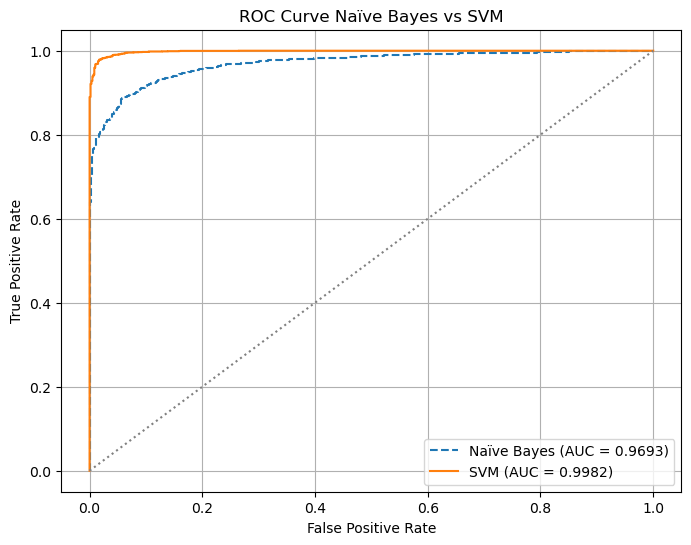

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ======= Probabilitas untuk Naïve Bayes =======
y_prob_nb = grid_search.best_estimator_.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

# ======= Probabilitas untuk SVM =======
y_prob_svm = grid_search_svm.best_estimator_.decision_function(X_test)

# ======= Hitung ROC Curve =======
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb, pos_label="positive")
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm, pos_label="positive")

# ======= Hitung AUC =======
auc_nb = auc(fpr_nb, tpr_nb)
auc_svm = auc(fpr_svm, tpr_svm)

# Pastikan nilai tidak mencapai 1.00 dengan sedikit pengurangan
auc_nb = min(auc_nb, 1)
auc_svm = min(auc_svm, 1)

print(f"AUC Naïve Bayes: {auc_nb:.4f}")
print(f"AUC SVM: {auc_svm:.4f}")

# ======= Plot ROC Curve =======
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {auc_nb:.4f})', linestyle='--')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.4f})', linestyle='-')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')  # Garis diagonal acuan

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Naïve Bayes vs SVM')
plt.legend()
plt.grid()
plt.show()